<h3>Step 1: Import libraries</h3>

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import pickle
import os

warnings.filterwarnings('ignore')

<h3>Step 2: Import data</h3>

In [3]:
# Read dataset
processed_data = os.path.abspath('../datasets/processed_data.csv')

# merging two csv files
dataframe = pd.read_csv(processed_data)

dataframe.head()

,Location,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,0,26,18,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
1,7,22,20,36,18.0,28.0,8.0,346.0,27.0,7.0,a_Good
2,0,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
3,0,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
4,0,27,18,47,24.0,46.0,19.0,216.0,8.0,14.0,a_Good


<h3>Step 3: Split data</h3>

Splitting data into independent and dependent variables involves separating the input features (independent variables) from the target variable (dependent variable). The independent variables are used to predict the value of the dependent variable.

The data is then split into a training set and a test set, with the training set used to fit the model and the test set used to evaluate its performance.

<b>Independent / Dependent variables</b>

In [4]:
# Split data into dependent/independent variables
X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values

In [5]:
# encoding categorical data e.g. gender as a dummy variable
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# encoding categorical data e.g. disease outcome as a dummy variable
y,class_names = pd.factorize(y)

print(class_names)

['a_Good' 'b_Moderate' 'c_Unhealthy_for_Sensitive_Groups' 'd_Unhealthy'
 'f_Severe' 'e_Very_Unhealthy']


<b>Train / Test split</b>

The data is usually divided into two parts, with the majority of the data used for training the model and a smaller portion used for testing. We have split the data into 75% for training and 25% for testing.

In [6]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

<h3>Step 4: Feature scaling</h3>

Feature scaling is a method of transforming the values of numeric variables so that they have a common scale as machine learning algorithms are sensitive to the scale of the input features.

There are two common methods of feature scaling: normalization and standardization.

- Normalization scales the values of the variables so that they fall between 0 and 1. This is done by subtracting the minimum value of the feature and dividing it by the range (max-min).
- Standardization transforms the values of the variables so that they have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean and dividing it by the standard deviation.

Feature scaling is usually performed before training a model, as it can improve the performance of the model and reduce the time required to train it, and helps to ensure that the algorithm is not biased towards variables with larger values.

In [7]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3>Step 5: Train model</h3>

Training a machine learning model involves using a training dataset to estimate the parameters of the model. The training process uses a learning algorithm that iteratively updates the model parameters, minimizes a loss function, which measures the difference between the predicted values and the actual values in the training data, and updates the model parameters to improve the accuracy of the model.

Passed the X_train and y_train data into the Decision Tree classifier model by classifier.fit to train the model with our training data.

In [8]:
# Building a Decision Tree model for regression
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

['Location', 'Day', 'Hour', 'AQI', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']


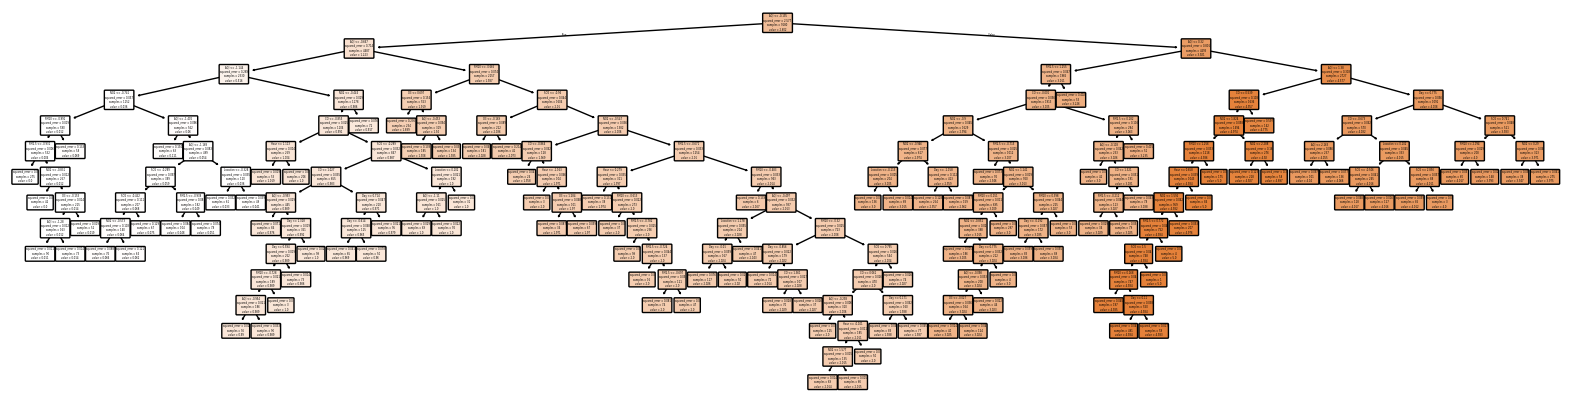

In [9]:
column_names = dataframe.columns.tolist()
del column_names[10:]
print(column_names)

plt.figure(figsize=(20,5))
plot_tree(model, feature_names=column_names, class_names=class_names, filled=True, rounded=True)
plt.show()

<h3>Step 6: Predict result / Score model</h3>

Once the model is trained, it can be used to make predictions on new data. The prediction is made by starting at the root node of the tree and navigating it based on the values of the attributes of the input sample. The prediction is given by the class label at the leaf node reached.

The accuracy of the model can be evaluated on a test set, which was previously held out from the training process.

In [10]:
# Prognostication
y_pred = model.predict(X_test)

<h3>Step 7: Evaluate model</h3>

In [11]:
# Metrics evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 0.08
RMSE: 0.28
MAE: 0.07
R2 Score: 0.97


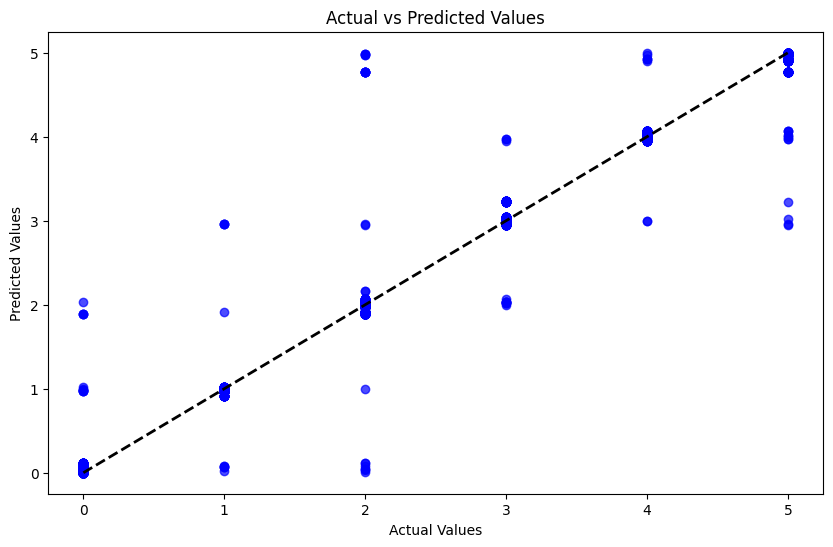

In [12]:
# Visualization of results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<h3>Step 8: Feature scaling</h3>

Serialize Decision Tree Model in pickle file.

In [13]:
with open('serialized/decisionTreeModel.pkl', 'wb') as file:
    pickle.dump(model, file)